In [1]:
!pip install transformers

In [2]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:\\Users\\Laptop World\\Desktop\\Sentiment Analysis\\twitter_training.csv", header=None)
df.columns = ["id", "entity", "label", "text"]

In [4]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # إزالة الروابط
    text = re.sub(r"@\w+", "", text)            # إزالة المنشن
    text = text.translate(str.maketrans("", "", string.punctuation))  # إزالة علامات الترقيم
    text = re.sub(r"\d+", "", text)             # إزالة الأرقام
    text = text.strip()
    return text

In [5]:
df["text"] = df["text"].astype(str).apply(clean_text)

In [6]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    test_texts, test_labels, test_size=0.5, random_state=42, stratify=test_labels
)

TF-IDF + Logistic Regression

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_texts)

In [11]:
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train, train_labels)

LogisticRegression(max_iter=300)

In [12]:
val_preds = lr_model.predict(X_val)
print("Accuracy:", accuracy_score(val_labels, val_preds))
print("F1 Score:", f1_score(val_labels, val_preds, average="weighted"))
print("\nClassification Report:\n", classification_report(val_labels, val_preds))

Accuracy: 0.6853240492769148
F1 Score: 0.6822923491500301

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.68      0.51      0.58      1299
    Negative       0.73      0.77      0.75      2254
     Neutral       0.64      0.65      0.64      1832
    Positive       0.68      0.74      0.71      2083

    accuracy                           0.69      7468
   macro avg       0.68      0.67      0.67      7468
weighted avg       0.68      0.69      0.68      7468



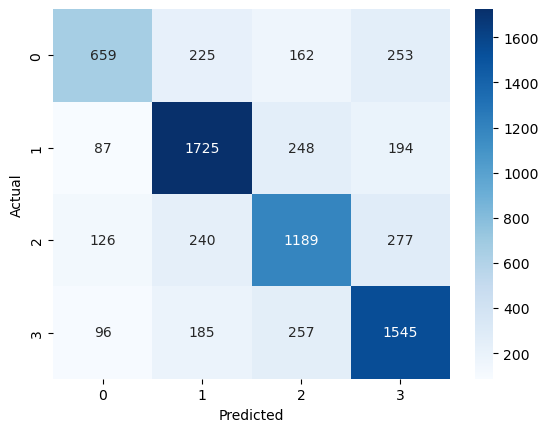

In [13]:
cm = confusion_matrix(val_labels, val_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
import streamlit as st
import torch
from transformers import pipeline

In [19]:
st.title("Sentiment Analysis App")

2025-08-11 22:14:16.808 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 22:14:16.905 
  command:

    streamlit run C:\Users\Laptop World\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-11 22:14:16.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [20]:
@st.cache_resource
def load_model():
    return pipeline("sentiment-analysis", model="bert-base-uncased")

In [21]:
nlp = load_model()

2025-08-11 22:15:00.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 22:15:00.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 22:15:00.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\Laptop World\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Laptop World\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
2025-08-11 22:15:01.489 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in 

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu
2025-08-11 22:16:28.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 22:16:28.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
